# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# 1. Loading Dataset

In [2]:
df_fake=pd.read_csv("Fake.csv")
df_true=pd.read_csv("True.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Data Cleaning

In [5]:
#Labels for Fake and True News
df_fake["class"]="F"
df_true["class"]="T"

#Merging the datasets
df=pd.concat([df_fake,df_true],axis=0)

#Merging the title and text columns to make it as the "news" column
df['news']=df['title']+df['text']
df.head(32000)

,title,text,subject,date,class,news
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",F,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",F,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",F,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",F,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",F,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...,...,...
8514,Ex-rival sues Illinois House speaker for 'dirt...,CHICAGO (Reuters) - A vanquished challenger to...,politicsNews,"August 8, 2016",T,Ex-rival sues Illinois House speaker for 'dirt...
8515,"A disenchanted Republican, fearing Trump, laun...",WASHINGTON (Reuters) - A former CIA officer an...,politicsNews,"August 8, 2016",T,"A disenchanted Republican, fearing Trump, laun..."
8516,"Billionaire Klarman slams Trump, vows to work ...",NEW YORK (Reuters) - Billionaire hedge fund ma...,politicsNews,"August 3, 2016",T,"Billionaire Klarman slams Trump, vows to work ..."
8517,"Trump, in shift, to call for top tax rate of 3...",WASHINGTON (Reuters) - Republican presidential...,politicsNews,"August 8, 2016",T,"Trump, in shift, to call for top tax rate of 3..."


In [6]:
#Dropping unnecessary columns
df=df.drop(["title","text"],axis=1)
#Rearranging the columns
df=df[["date","subject","news","class"]]

In [7]:
df.head(32000)

,date,subject,news,class
0,"December 31, 2017",News,Donald Trump Sends Out Embarrassing New Year’...,F
1,"December 31, 2017",News,Drunk Bragging Trump Staffer Started Russian ...,F
2,"December 30, 2017",News,Sheriff David Clarke Becomes An Internet Joke...,F
3,"December 29, 2017",News,Trump Is So Obsessed He Even Has Obama’s Name...,F
4,"December 25, 2017",News,Pope Francis Just Called Out Donald Trump Dur...,F
...,...,...,...,...
8514,"August 8, 2016",politicsNews,Ex-rival sues Illinois House speaker for 'dirt...,T
8515,"August 8, 2016",politicsNews,"A disenchanted Republican, fearing Trump, laun...",T
8516,"August 3, 2016",politicsNews,"Billionaire Klarman slams Trump, vows to work ...",T
8517,"August 8, 2016",politicsNews,"Trump, in shift, to call for top tax rate of 3...",T


# 2. Data Preprocessing

In [8]:
#Checking for null values
df.isnull().sum()

date       0
subject    0
news       0
class      0
dtype: int64

In [9]:
#Lowercasing and Removing punctuations, special characters
def drop_words(news):
    news = str(news).lower()
    news = re.sub('\[.*?\]', '', news)
    news = re.sub('https?://\S+|www\.\S+', '', news)
    news = re.sub('<.*?>+', '', news)
    news = re.sub('[%s]' % re.escape(string.punctuation), '', news)
    news = re.sub('\n', '', news)
    news = re.sub('\w*\d\w*', '', news)
    return news
clean_news=df.copy()
clean_news['news']=clean_news['news'].apply(lambda x:drop_words(x))
clean_news.head()

,date,subject,news,class
0,"December 31, 2017",News,donald trump sends out embarrassing new year’...,F
1,"December 31, 2017",News,drunk bragging trump staffer started russian ...,F
2,"December 30, 2017",News,sheriff david clarke becomes an internet joke...,F
3,"December 29, 2017",News,trump is so obsessed he even has obama’s name...,F
4,"December 25, 2017",News,pope francis just called out donald trump dur...,F


In [10]:
#Removing Stopwords
stop = stopwords.words('english')
clean_news['news'] = clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,date,subject,news,class
0,"December 31, 2017",News,donald trump sends embarrassing new year’s eve...,F
1,"December 31, 2017",News,drunk bragging trump staffer started russian c...,F
2,"December 30, 2017",News,sheriff david clarke becomes internet joke thr...,F
3,"December 29, 2017",News,trump obsessed even obama’s name coded website...,F
4,"December 25, 2017",News,pope francis called donald trump christmas spe...,F


# Dataset Analysis

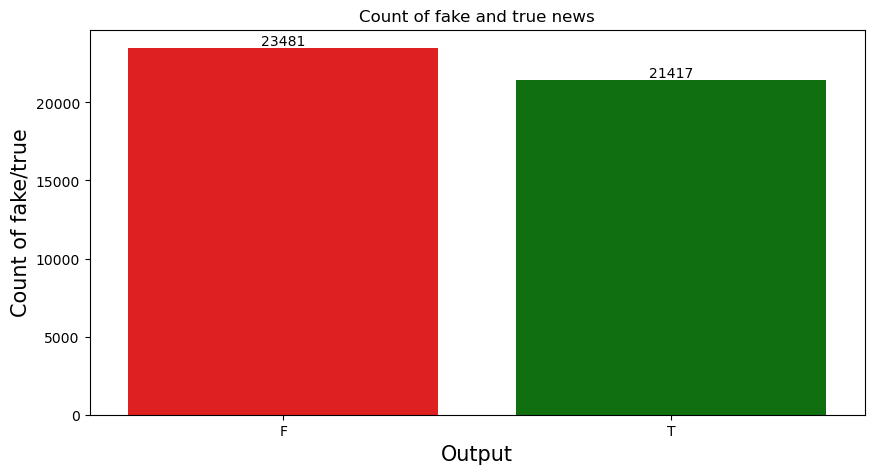

In [11]:
#Graph representing count of fake and true news
ax=sns.countplot(x="class",palette=["red","green"], data=clean_news)
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

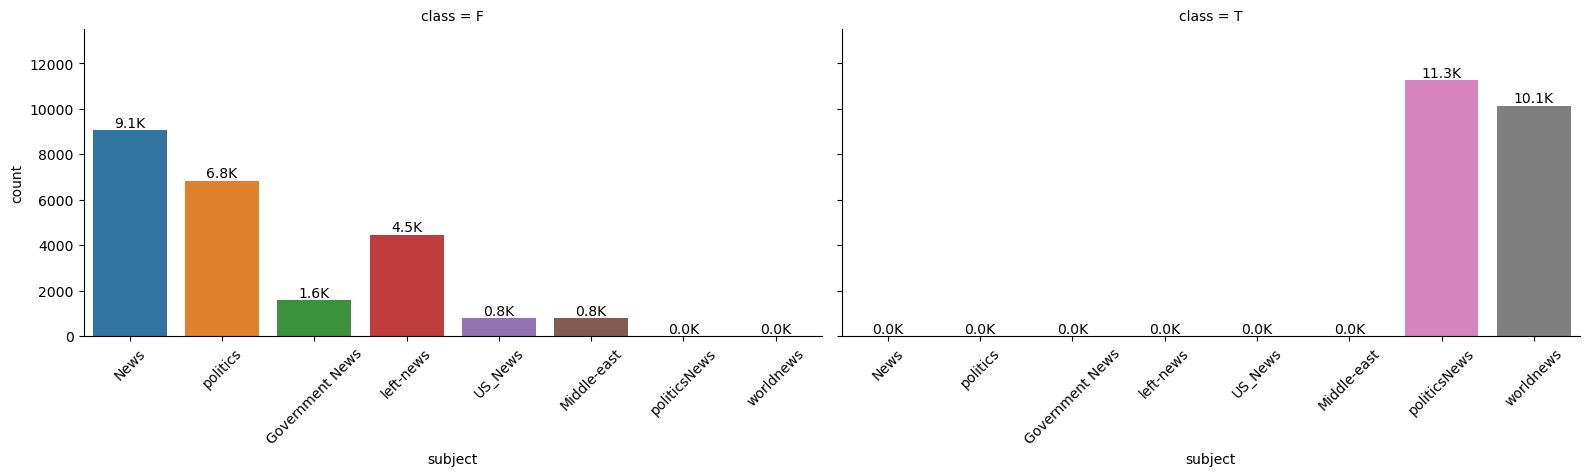

In [12]:
#Graph for count of news based on the subject
g = sns.catplot(x="subject", col="class",
                data=clean_news, kind="count",
                height=4, aspect=2)
g.set_xticklabels(rotation=45)
for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.show()

# 3. Feature Engineering

# 3.1 Feature Highlights

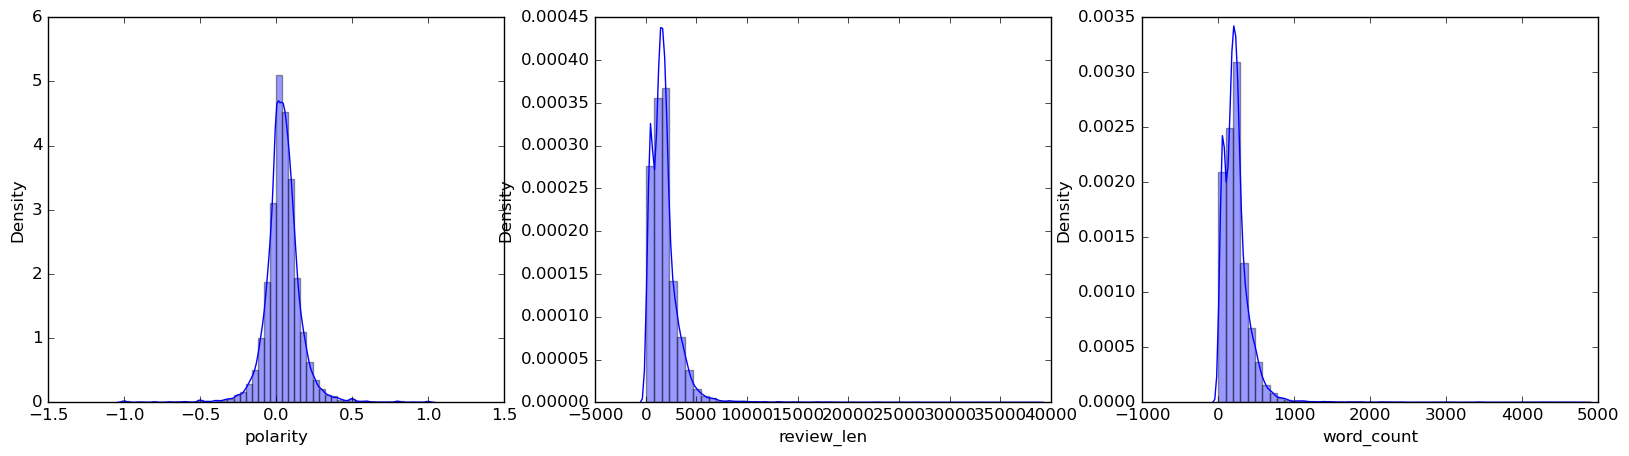

In [13]:
#Highlighting the features from the news
clean_news['polarity'] = clean_news['news'].map(lambda text: TextBlob(text).sentiment.polarity)
clean_news['review_len'] = clean_news['news'].astype(str).apply(len)
clean_news['word_count'] = clean_news['news'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the features
plt.figure(figsize = (20, 5))
plt.style.use('classic')
plt.subplot(131)
sns.distplot(clean_news['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(clean_news['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(clean_news['word_count'])
fig = plt.gcf()

# 3.2 N-Gram Analysis

In [14]:
#Unigram Analysis
def get_top_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_words(clean_news['news'], 10)
df = pd.DataFrame(common_words, columns = ['news' , 'count'])
df.groupby('news').sum()['count'].sort_values(ascending=False)

news
trump        140400
said         130258
us            68081
would         55422
president     53189
people        41718
one           36146
state         33190
new           31799
also          31209
Name: count, dtype: int64

In [15]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle="Frequent words",yTitle='Count',colors="red", linecolor='black', title='Top 10 words in news')

In [16]:
#Bigram Analysis
def get_top_2_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_2_words(clean_news['news'], 10)
df = pd.DataFrame(common_words, columns = ['news' , 'count'])
df.groupby('news').sum()['count'].sort_values(ascending=False)

news
donald trump        25059
united states       18394
white house         15485
hillary clinton      9502
new york             8110
north korea          7053
president donald     6928
image via            6188
barack obama         5603
trump said           4816
Name: count, dtype: int64

In [17]:
df.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle="Frequent words", yTitle='Count',colors="green", linecolor='black', title='Top 10 2-words in news')

# 3.3 Word Cloud

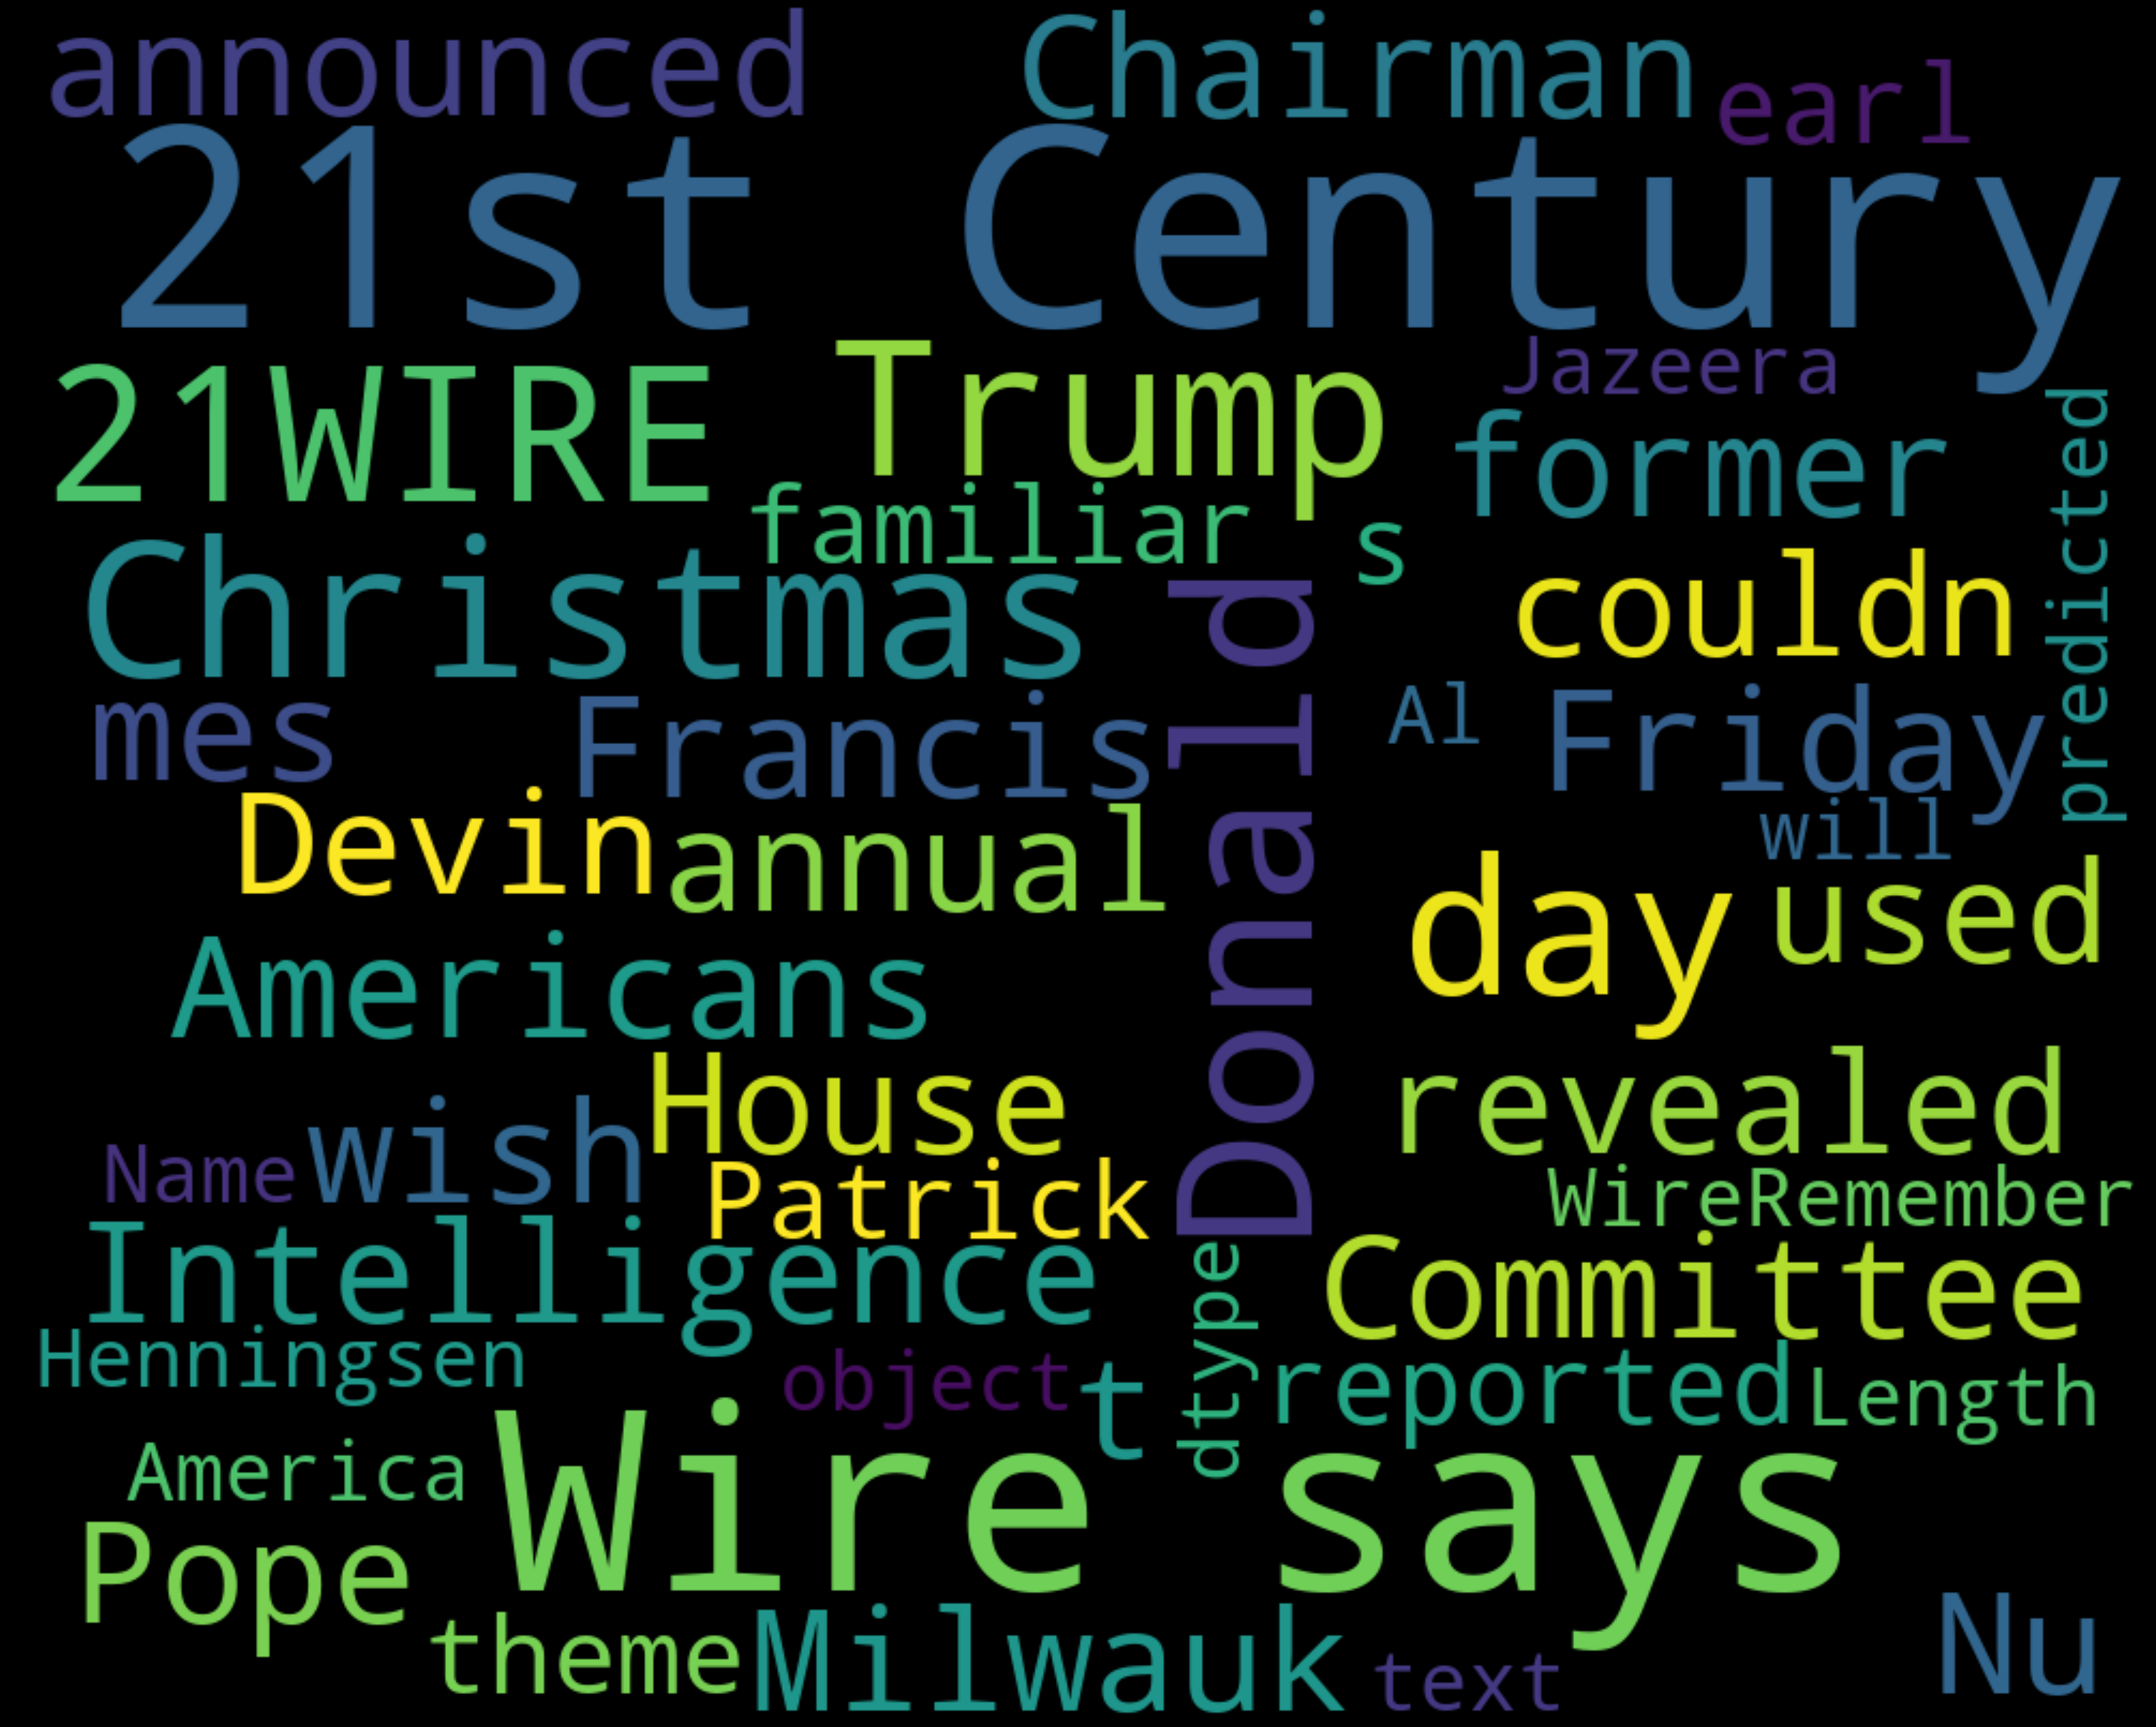

In [18]:
#Word cloud for fake dataset
text = df_fake["text"]
wordcloud = WordCloud(
    width = 1000,
    height = 800,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

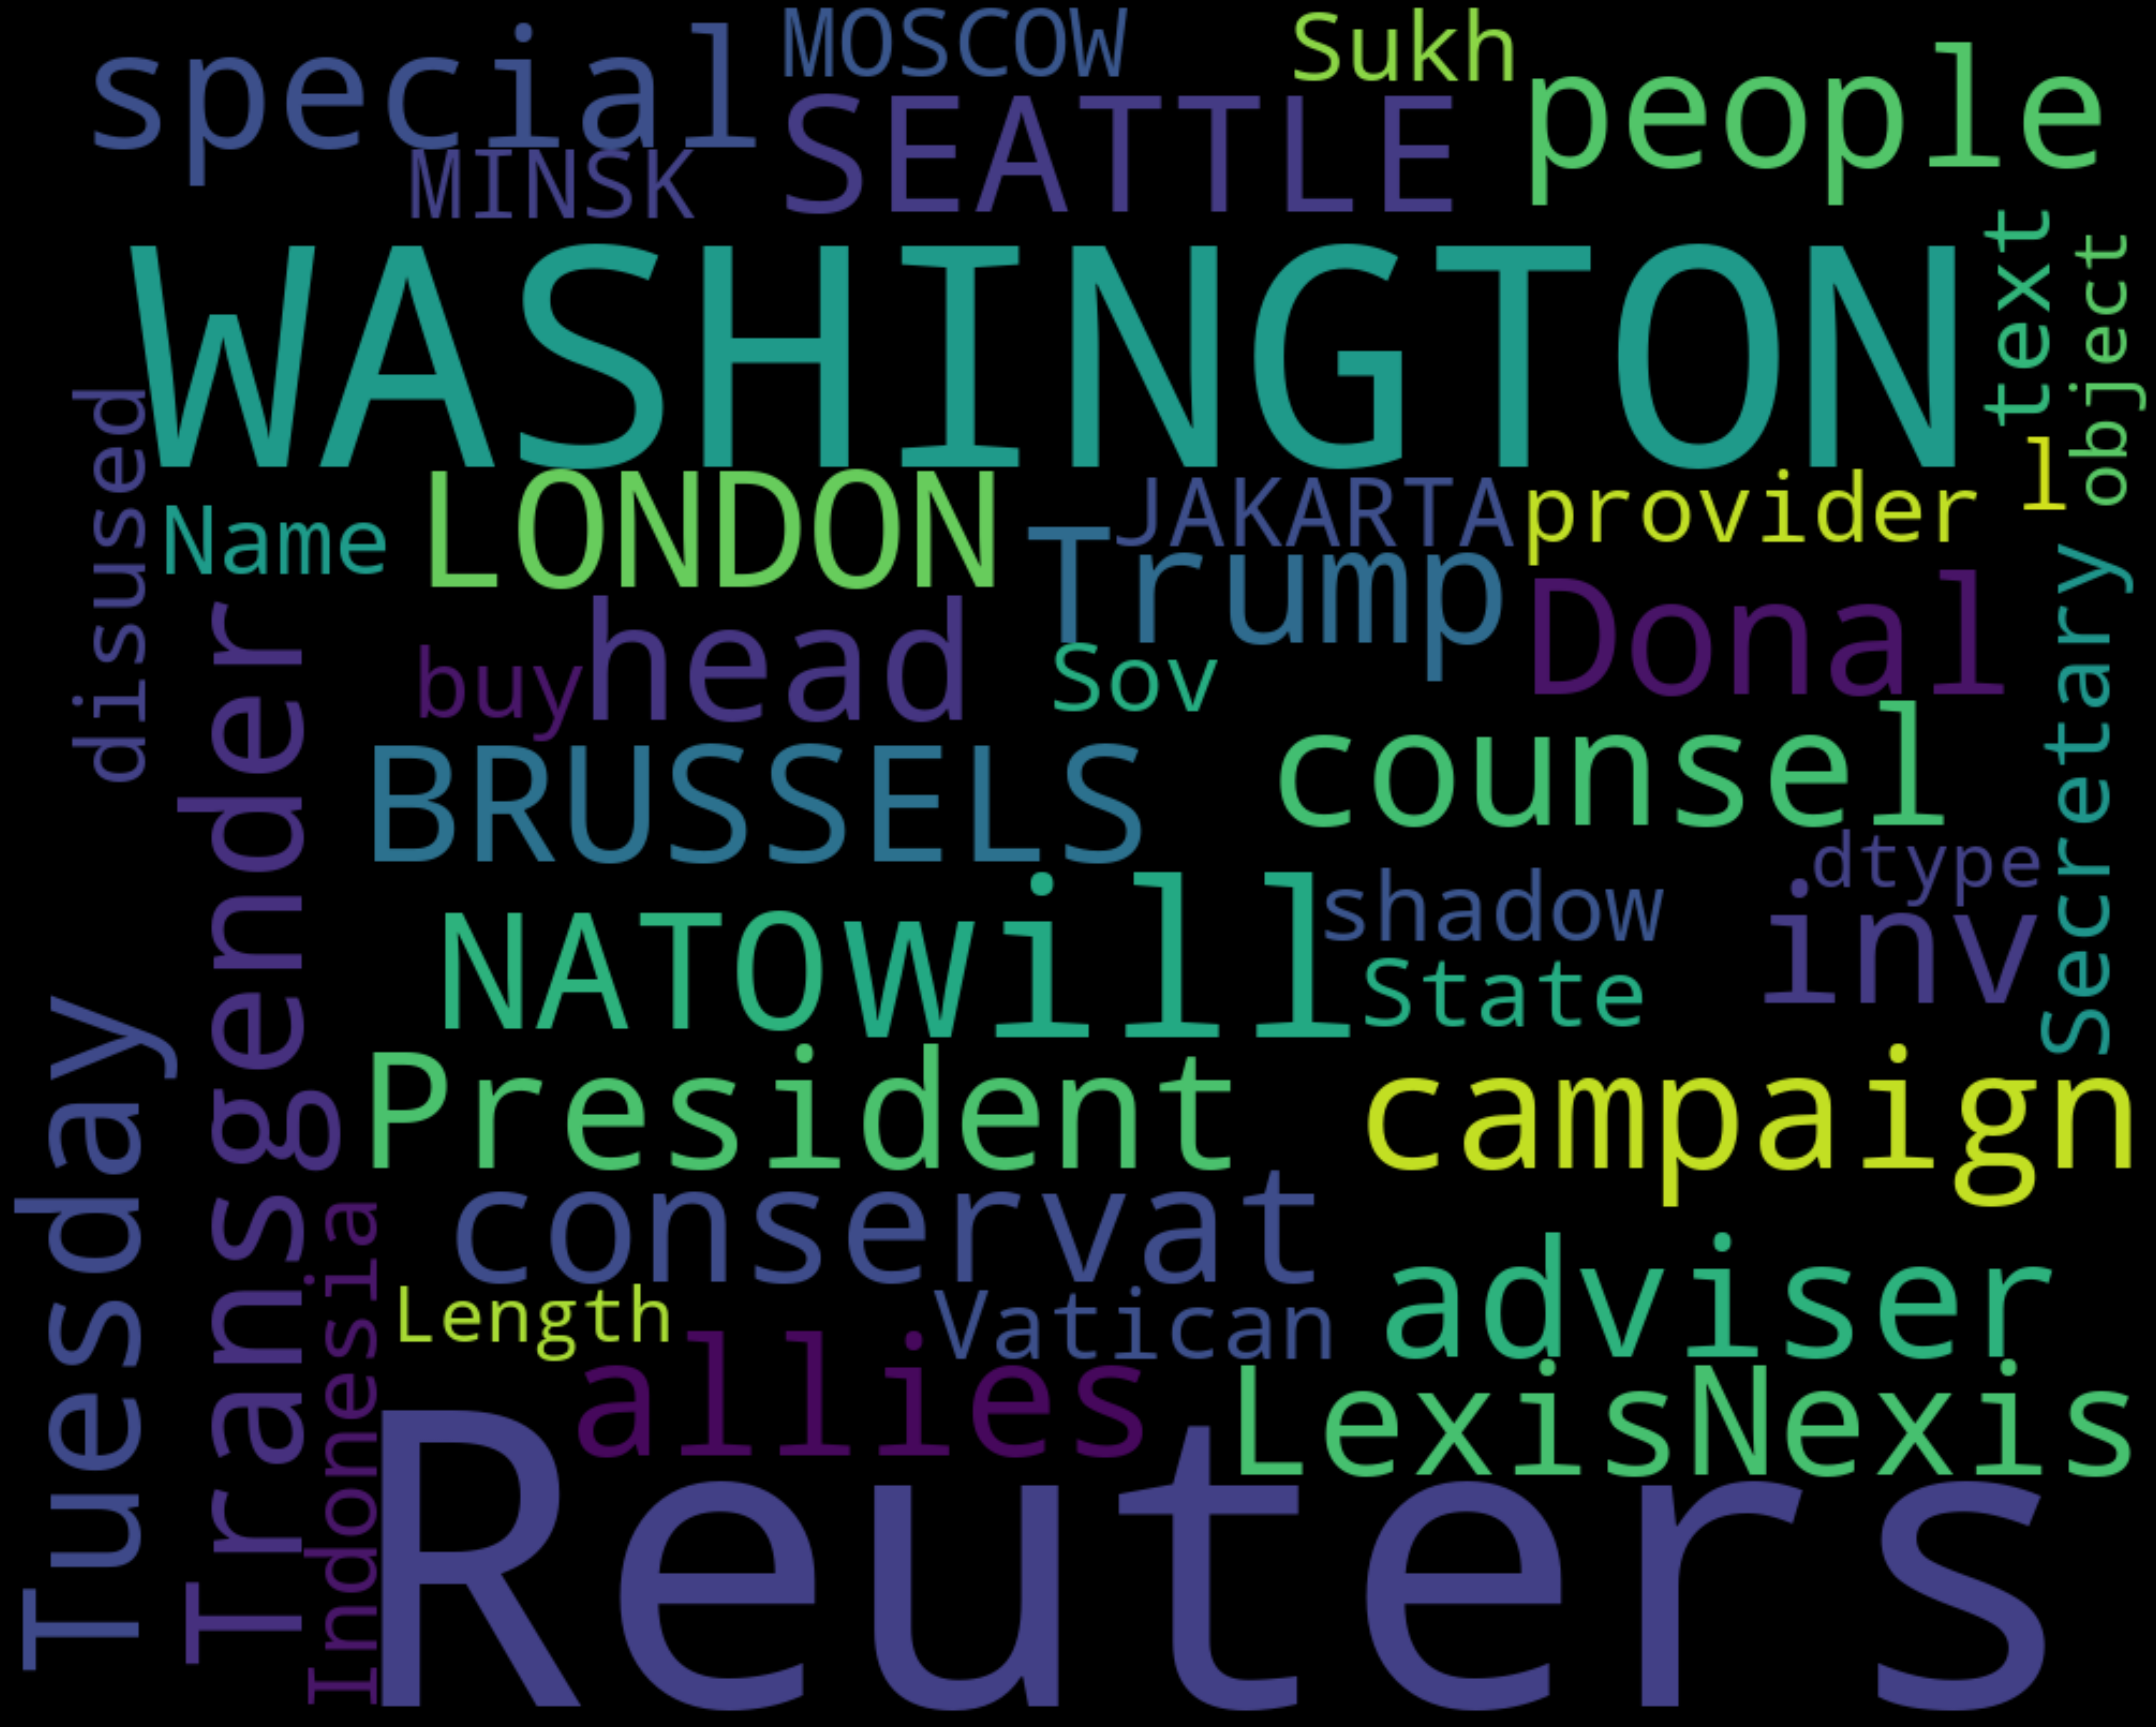

In [19]:
#Word cloud for true dataset
text = df_true["text"]
wordcloud = WordCloud(
    width = 1000,
    height = 800,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# 4. Text Preprocessing

In [20]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()

,news
0,donald trump sends embarrassing new year’s eve...
1,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes internet joke thr...
3,trump obsessed even obama’s name coded website...
4,pope francis called donald trump christmas spe...


In [21]:
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)   
corpus[1]    

'drunk brag trump staffer start russian collus investigationhous intellig committe chairman devin nune go bad day assumpt like mani us christoph steeledossi prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york timesform trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clintonon top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah elsisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boyin may papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt thendemocrat presidenti nomine hillari clinton exactli much mr papadopoulo said night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici p

In [22]:
#Changing the F,T labels to numeric values
clean_news["class"]=pd.Categorical(clean_news["class"]).codes
view=clean_news[["date","subject","news","class"]]
view.head(32000)

,date,subject,news,class
0,"December 31, 2017",News,donald trump sends embarrassing new year’s eve...,0
1,"December 31, 2017",News,drunk bragging trump staffer started russian c...,0
2,"December 30, 2017",News,sheriff david clarke becomes internet joke thr...,0
3,"December 29, 2017",News,trump obsessed even obama’s name coded website...,0
4,"December 25, 2017",News,pope francis called donald trump christmas spe...,0
...,...,...,...,...
8514,"August 8, 2016",politicsNews,exrival sues illinois house speaker dirty elec...,1
8515,"August 8, 2016",politicsNews,disenchanted republican fearing trump launches...,1
8516,"August 3, 2016",politicsNews,billionaire klarman slams trump vows work clin...,1
8517,"August 8, 2016",politicsNews,trump shift call top tax rate percent rather p...,1


# 5. Feature Extraction

# 5.1 Word Embedding by TF-IDF Vectorizer

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(44898, 1000)

In [24]:
y=clean_news['class']
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({0: 23481, 1: 21417})


In [25]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 5.2 One hot Representation

In [57]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [27]:
corpus[0]

'donald trump send embarrass new year eve messag disturbingdonald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald j trump realdonaldtrump decemb tweet went welll expectwhat kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov decemb use word hater

# 5.3 Padding

In [28]:
#Setting sentence length
sent_length=1000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 6162 3044 6437]
 [   0    0    0 ... 1960 8366 6437]
 [   0    0    0 ... 4456 6559 6437]
 ...
 [   0    0    0 ...  727 2564 8769]
 [   0    0    0 ... 3752 5242 2308]
 [   0    0    0 ... 1937 1914  845]]


# 6. Model Selection

We are going to choose the LSTM model that is a deep learning approach with a powerful ability of differentiating the news authenticity.

# 7. LSTM Model Building

In [29]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 40)          400000    
                                                                 
 dropout (Dropout)           (None, 1000, 40)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 456501 (1.74 MB)
Trainable params: 456501 (1.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [30]:
len(embedded_docs),y.shape

(44898, (44898,))

# 8. LSTM Model Fitting

In [31]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((44898, 1000), (44898,))

# 9. LSTM Model Training

In [32]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

# Fitting with 10 epochs and 128 batch size
print("Training the model")
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=128)

Training the model
Epoch 1/10
246/246 [==============================] - 733s 3s/step - loss: 0.2143 - accuracy: 0.9127 - val_loss: 0.0985 - val_accuracy: 0.9647
Epoch 2/10
246/246 [==============================] - 734s 3s/step - loss: 0.1053 - accuracy: 0.9680 - val_loss: 0.0996 - val_accuracy: 0.9661
Epoch 3/10
246/246 [==============================] - 753s 3s/step - loss: 0.0563 - accuracy: 0.9821 - val_loss: 0.0752 - val_accuracy: 0.9768
Epoch 4/10
246/246 [==============================] - 798s 3s/step - loss: 0.0673 - accuracy: 0.9764 - val_loss: 0.0582 - val_accuracy: 0.9831
Epoch 5/10
246/246 [==============================] - 808s 3s/step - loss: 0.0646 - accuracy: 0.9769 - val_loss: 0.1027 - val_accuracy: 0.9631
Epoch 6/10
246/246 [==============================] - 830s 3s/step - loss: 0.0336 - accuracy: 0.9889 - val_loss: 0.0538 - val_accuracy: 0.9832
Epoch 7/10
246/246 [==============================] - 822s 3s/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0523 - v

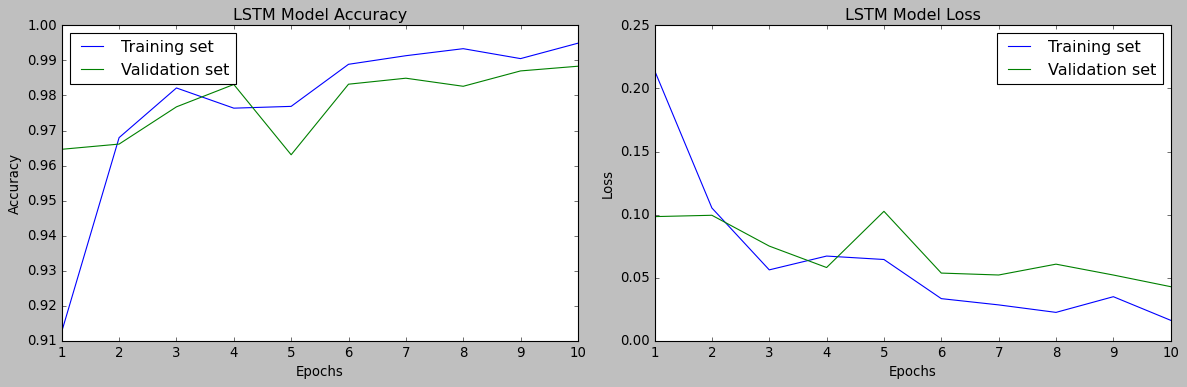

In [33]:
#Plotting the results
acc=r.history['accuracy']
val_acc=r.history['val_accuracy']
loss=r.history['loss']
val_loss=r.history['val_loss']
epochs_range=range(1,len(r.epoch)+1)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training set")
plt.plot(epochs_range,val_acc,label="Validation set")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Model Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training set")
plt.plot(epochs_range,val_loss,label="Validation set")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Model Loss")

plt.tight_layout()
plt.show()

# 10. LSTM Model Evaluation

# 10.1 Confusion Matrix

421/421 [==============================] - 101s 228ms/step
Confusion matrix, without normalization


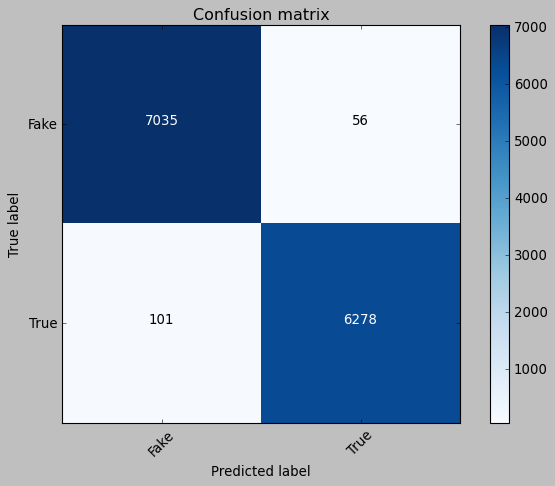

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pred=(model.predict(X_test) > 0.5).astype("int32")
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,classes=['Fake','True'])

# 10.2 Model Accuracy

In [35]:
print('Accuracy of LSTM model on test set: {:.4f}'.format(accuracy_score(y_test,y_pred)))

Accuracy of LSTM model on test set: 0.9883


# 10.3 Classification Report

In [36]:
 print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7091
           1       0.99      0.98      0.99      6379

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



# 10.4 ROC-AUC Curve

In [37]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

421/421 [==============================] - 98s 234ms/step


In [38]:
#AUC value
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print("The AUC value is:",auc_keras)

The AUC value is: 0.9989339314506559


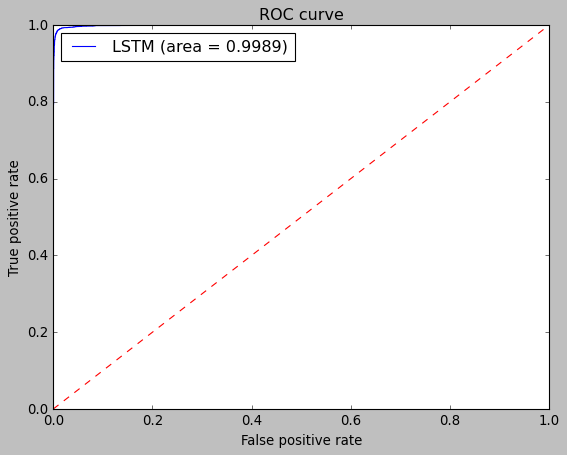

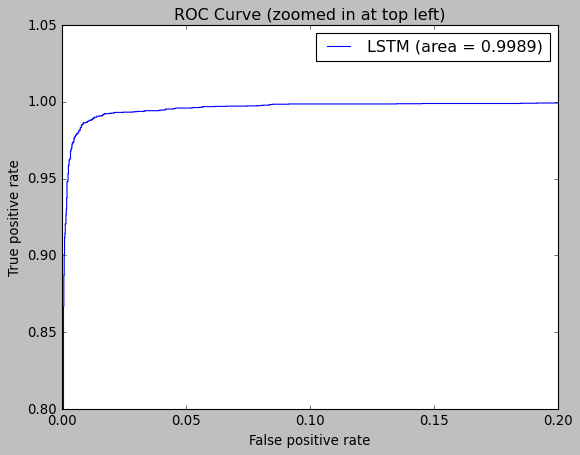

In [39]:
#Plotting the ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_keras, tpr_keras, label='LSTM (area = {:.4f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1.05)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr_keras, tpr_keras, label='LSTM (area = {:.4f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()